# Introduction

In machine learning, validation curves are used to determine the training and validation scores of a classifier for different hyperparameter values. This can help in selecting the best hyperparameters for a model. In this lab, we will use scikit-learn to plot validation curves for a support vector machine (SVM) classifier.

# Loading the Dataset

We will begin by loading the digits dataset from scikit-learn and selecting a subset of the data for binary classification of the digits 1 and 2.

In [2]:
from sklearn.datasets import load_digits
import numpy as np

X, y = load_digits(return_X_y=True)
subset_mask = np.isin(y, [1,2]) # binary classification 1 vs 2
X, y = X[subset_mask], y[subset_mask]

# Defining the Hyperparameter Range

We will define a range of values for the SVM kernel parameter gamma that we want to test.

In [3]:
param_range = np.logspace(-6, -1, 5)

# Computing Validation Scores

We will use the **validation_curve** function from scikit-learn to compute the training and validation scores for the SVM classifier with different values of gamma.

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    SVC(),
    X,
    y,
    param_name='gamma',
    param_range=param_range,
    scoring='accuracy',
)

# Plotting the Validation Curves

We will use matplotlib to plot the training and validation scores as a function of gamma.

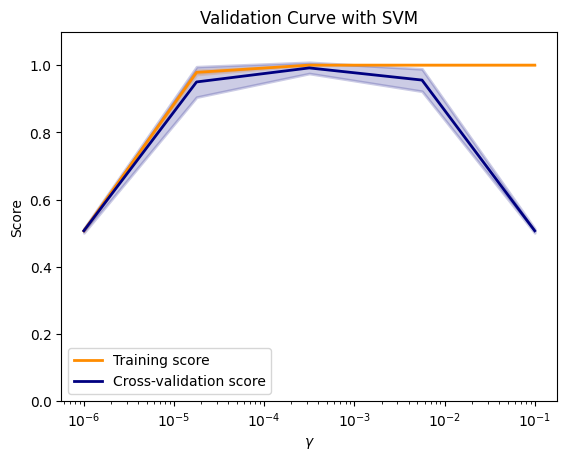

In [5]:
import matplotlib.pyplot as plt

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

# Summary

In this lab, we learned how to use scikit-learn to plot validation curves for a support vector machine classifier. We loaded a dataset, defined a range of hyperparameter values, computed the validation scores, and plotted the results. This can help in selecting the best hyperparameters for a model and improving its performance.